In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder 
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.DataFrame({
    "Ob-Havo" : ["Yomg'ir","Yomg'ir","Bulutli","Quyoshli","Quyoshli","Quyoshli","Bulutli","Yomg'ir","Yomg'ir","Quyoshli",
                "Yomg'ir","Bulutli","Bulutli","Quyoshli"] ,
    "Temp" : ["Issiq","Issiq","Issiq","Yaxshi","Salqin","Salqin","Salqin","Yaxshi","Salqin","Yaxshi","Yaxshi","Yaxshi",
             "Issiq","Yaxshi"],
    "Namlik" : ["Yuqori","Yuqori","Yuqori","Yuqori","Normal","Normal","Normal","Yuqori","Normal","Normal","Normal","Yuqori",
               "Normal","Yuqori"],
    "Shamol" : [False,True,False,False,False,True,True,False,False,False,True,True,False,True],
    "Oyinchilar" : [25,30,46,45,52,23,43,35,38,46,48,52,44,30]
})
data

,Ob-Havo,Temp,Namlik,Shamol,Oyinchilar
0,Yomg'ir,Issiq,Yuqori,False,25
1,Yomg'ir,Issiq,Yuqori,True,30
2,Bulutli,Issiq,Yuqori,False,46
3,Quyoshli,Yaxshi,Yuqori,False,45
4,Quyoshli,Salqin,Normal,False,52
5,Quyoshli,Salqin,Normal,True,23
6,Bulutli,Salqin,Normal,True,43
7,Yomg'ir,Yaxshi,Yuqori,False,35
8,Yomg'ir,Salqin,Normal,False,38
9,Quyoshli,Yaxshi,Normal,False,46


In [3]:
ordinal = OrdinalEncoder()
data[['Ob-Havo','Temp','Namlik','Shamol']] = ordinal.fit_transform(data.drop('Oyinchilar',axis=1))
data

,Ob-Havo,Temp,Namlik,Shamol,Oyinchilar
0,2.0,0.0,1.0,0.0,25
1,2.0,0.0,1.0,1.0,30
2,0.0,0.0,1.0,0.0,46
3,1.0,2.0,1.0,0.0,45
4,1.0,1.0,0.0,0.0,52
5,1.0,1.0,0.0,1.0,23
6,0.0,1.0,0.0,1.0,43
7,2.0,2.0,1.0,0.0,35
8,2.0,1.0,0.0,0.0,38
9,1.0,2.0,0.0,0.0,46


In [4]:
x = data.drop('Oyinchilar',axis=1).values
y = data['Oyinchilar'].values

In [7]:
dt = DecisionTreeRegressor(max_depth=4, min_impurity_decrease=10.0,
                      min_samples_leaf=2)
dt.fit(x,y)

DecisionTreeRegressor(max_depth=4, min_impurity_decrease=10.0,
                      min_samples_leaf=2)

In [9]:
dt.score(x,y)

0.6488832775461468

In [ ]:
dt.

In [47]:
from sklearn.tree import plot_tree

In [50]:
names = data.drop('Oyinchilar',axis=1).columns

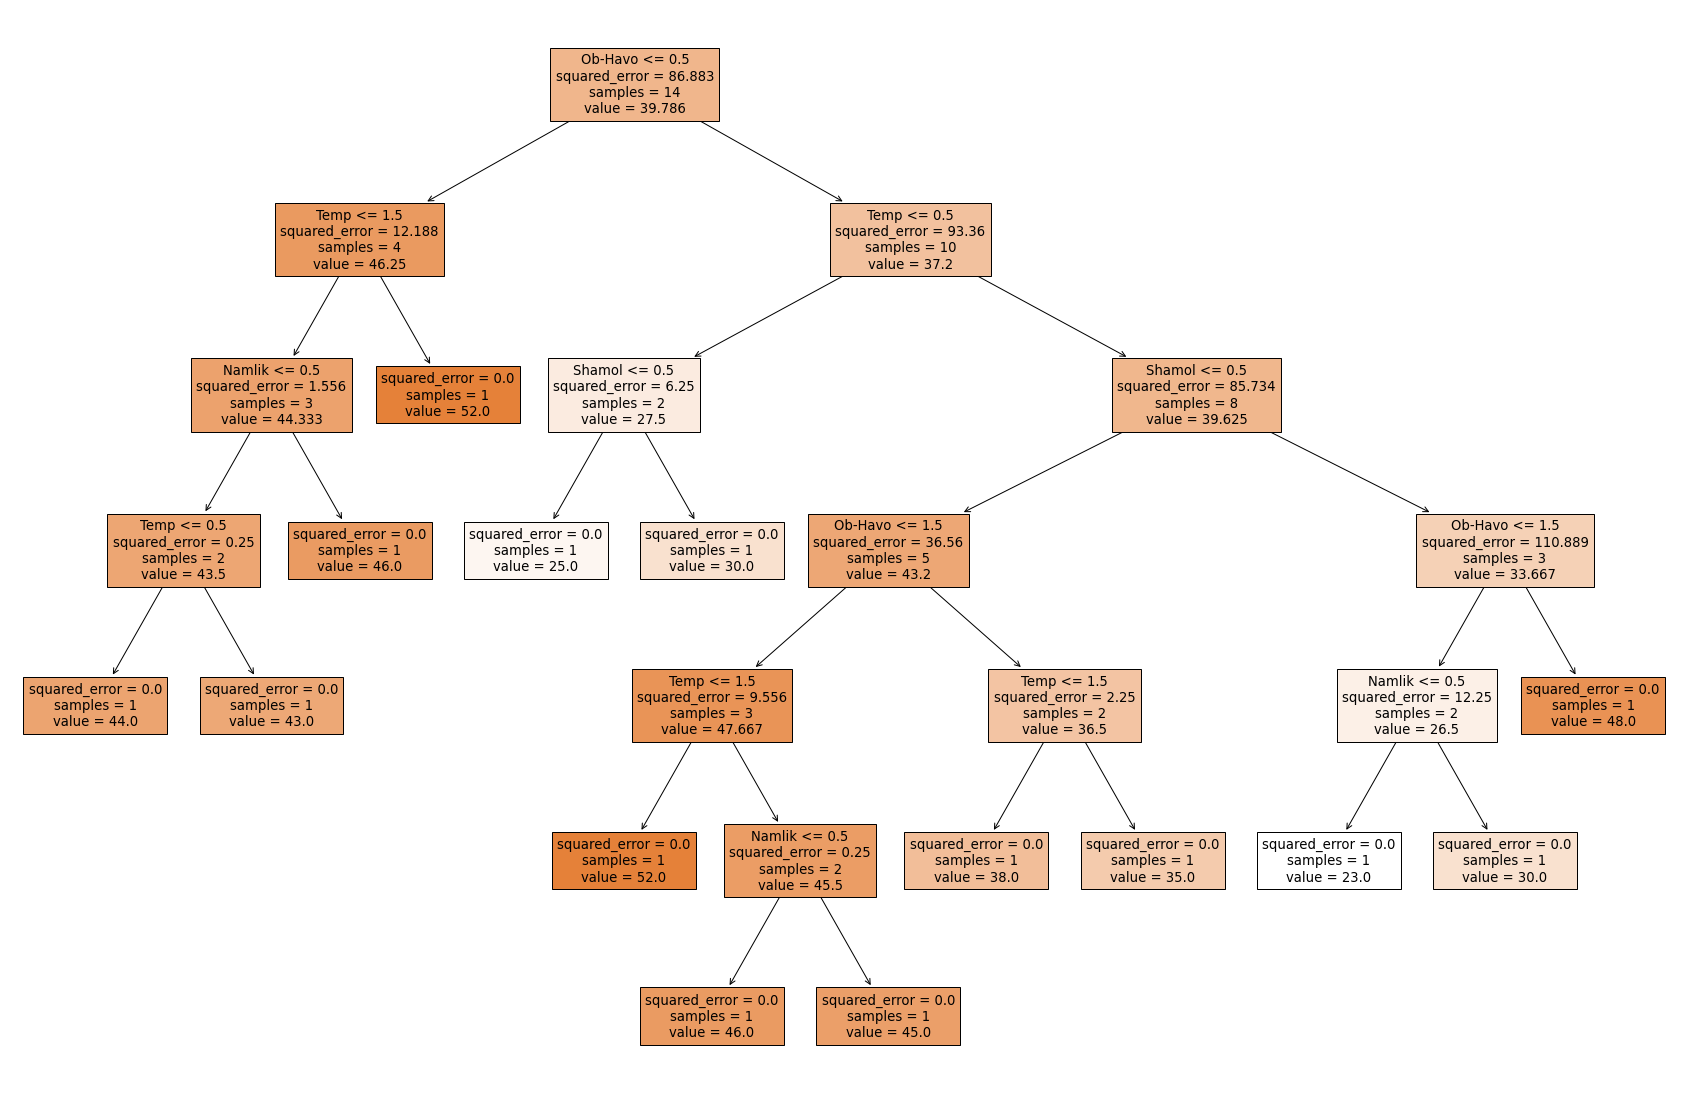

In [51]:
plt.figure(figsize=(30,20))
plot_tree(dt,feature_names=names,filled=True)
plt.show()